In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/USER/Desktop/Github/Python Project/hahow_course.csv')
df.head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07T16:00:00.000Z,2019-10-09T04:00:34.912Z,2020-01-06T16:00:00.000Z,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,1290,1990,False,INCUBATING,0
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06T16:00:00.000Z,2019-10-08T03:00:36.293Z,2020-01-05T16:00:00.000Z,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,False,30,1200,1580,False,INCUBATING,17
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01T16:00:00.000Z,2019-10-03T04:00:13.830Z,2019-12-31T16:00:00.000Z,NaN,[],0,0.0,False,30,1288,1990,False,INCUBATING,28
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31T16:00:00.000Z,2019-10-02T04:00:32.590Z,2019-12-30T16:00:00.000Z,NaN,[],0,0.0,False,30,1800,2900,False,INCUBATING,6
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30T16:00:00.000Z,2019-10-01T04:00:20.253Z,2019-12-29T16:00:00.000Z,NaN,[],0,0.0,False,30,1450,2500,False,INCUBATING,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 17 columns):
Unnamed: 0       384 non-null int64
title            384 non-null object
author           384 non-null object
proposal         384 non-null object
incubate         384 non-null object
estimateStart    384 non-null object
startCapital     52 non-null object
types            384 non-null object
ratings          384 non-null int64
avg_ratings      384 non-null float64
isReject         384 non-null bool
successCriti     384 non-null int64
prePrice         384 non-null int64
price            384 non-null int64
review           384 non-null bool
status           384 non-null object
solidTickets     384 non-null int64
dtypes: bool(2), float64(1), int64(6), object(8)
memory usage: 45.9+ KB


In [5]:
#時間格式轉換

df.proposal = pd.to_datetime(df.proposal).apply(lambda x:x.date())
df.incubate = pd.to_datetime(df.incubate).apply(lambda x:x.date())
df.estimateStart = pd.to_datetime(df.estimateStart).apply(lambda x:x.date())
#(lambda x:x.date()):將時間保留至"日期"就好

#新增一個募資的"月份"欄位
df['pro_month'] = df.proposal.apply(lambda x:x.month)

df['have'] = 1

df.head(10)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07,2019-10-09,2020-01-06,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,1290,1990,False,INCUBATING,0,11,1
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06,2019-10-08,2020-01-05,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,False,30,1200,1580,False,INCUBATING,17,11,1
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01,2019-10-03,2019-12-31,NaN,[],0,0.0,False,30,1288,1990,False,INCUBATING,28,11,1
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31,2019-10-02,2019-12-30,NaN,[],0,0.0,False,30,1800,2900,False,INCUBATING,6,10,1
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30,2019-10-01,2019-12-29,NaN,[],0,0.0,False,30,1450,2500,False,INCUBATING,5,10,1
5,5,小資族保險的第一堂入門課,李柏鋒,2019-10-25,2019-09-26,2019-12-24,NaN,[],0,0.0,False,50,988,1688,False,INCUBATING,210,10,1
6,6,創作你的療癒香草茶！百種風味搭配邏輯,myhouse,2019-10-23,2019-09-24,2019-12-22,2019-09-24T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,999,1680,False,INCUBATING,93,10,1
7,7,托福口說拿分 4 原則｜發音、表達一把罩,英文不難,2019-10-18,2019-09-19,2019-12-17,NaN,[],0,0.0,False,30,1890,2500,False,INCUBATING,49,10,1
8,8,LOGO 必修課：發展品牌識別的第一步,馮宇 X 圖文不符,2019-10-17,2019-09-18,2019-12-16,2019-09-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",0,0.0,False,100,1800,2400,False,INCUBATING,431,10,1
9,9,Excel VBA 金融資料抓取 | 打造股票研究系統,Raymond Chien,2019-10-16,2019-09-17,2019-12-15,NaN,[],0,0.0,False,30,2350,3450,False,INCUBATING,138,10,1


提案的月份分布:


In [13]:
#plotly Visualization

data = go.Scatter(
x = df.groupby(df.pro_month).have.sum().index,  
y = df.groupby(df.pro_month).have.sum())

layout = dict(title = '提案的月份分布')

fig = dict(data = data, layout = layout)

py.iplot(fig)



看一下募資人數(successCriti)的分佈：


R套件ggplot其實在Python也是可以使用的，把matplotlib的風格（style）設置為ggplot:


Text(0.5, 0, '人數門檻')

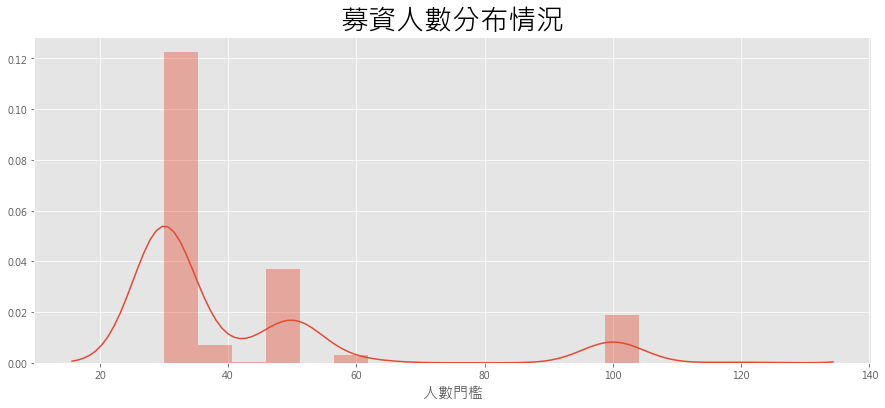

In [18]:
plt.style.use('ggplot')

#解決中文顯示問題
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize = (15,6))
sns.distplot(df.successCriti, kde=True) #長條圖
plt.title('募資人數分布情況', fontsize = 28)
plt.xlabel('人數門檻', fontsize = 15)

大部分募資人數都以30、50、100人為臨界點，可見我們可以30人為一個小型工作坊人數限制（社團內舉辦），50為中型（社團間合辦），100為大型活動（校際合辦）。


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [29]:
pip install jieba

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
#文字雲

highGate_proposal = df[df.successCriti>90]

title = ''

for name in highGate_proposal.title:
    title += name
    
removeWord = []
for word in removeWord:
    title = title.replace(word, '')
    

In [37]:
title

'LOGO 必修課：發展品牌識別的第一步英雄之旅：自己的故事，別當配角一支燈學打光，家裡就是攝影棚【影像說書人】攝影不只是按下快門職場必備的批判思考力：基礎篇IG 全攻略：從零開始的 Instagram 經營學醫學簡報快製力ChatBot 從 0 到 1 突破演算法の後社群神器15 單元看懂經濟運行，掌握全球投資趨勢打造被動收入：建立人生主導權的系統化做法百萬 YouTuber 阿滴－攻心剪輯術！火頭工做麵包：用科學方法學做健康麵包動畫背後邏輯與創意－臺灣吧知識轉譯力標標標標標準字 - 從生活創意到邏輯實踐ETF 投資全球：帶你量身打造專屬資產配置啾啾鞋的資料彙整術 - 別淹沒在資訊海！伸縮自如的字體課：從基本功到創意風格台科 EMBA 年年爆滿的一門 Word 課（B+C 系列）設計師接案學－業界求生必備守則平面設計 - 從理論到實務運用及對談 (初階)【電商正夯】找工作找實習必備 4 大技能畫你、畫他、畫我們的人物頭像！240 分鐘 - 忘掉拍照，學會攝影精準設計：簡報心法篇社群力：30 堂課突破你的內容行銷盲點！打動人心的創作秘密，畫出個性的角色設計用程式構築的繪畫世界 — CSS 繪圖40 張佈燈圖來看打燈這回事從 0 開始學 AE（上集）｜動態設計基礎Python Web 程式設計入門實戰藝用解剖學1 - 達文西維特魯威人怪獸工場 - 基礎角色造型篇怪獸工場-遊戲場景設計篇能輕鬆製作的定格動畫/合成特效 Vol.1JavaScript 程式設計新手村iOS 入門 － 從介面設計到開發小編必學，百萬觀眾動畫製作術－動畫星球男友必學攝影課 by 有fu攝影讓圖不只是好看的－資訊設計思考力！'

In [38]:
removeWord

[]

<Figure size 432x288 with 0 Axes>

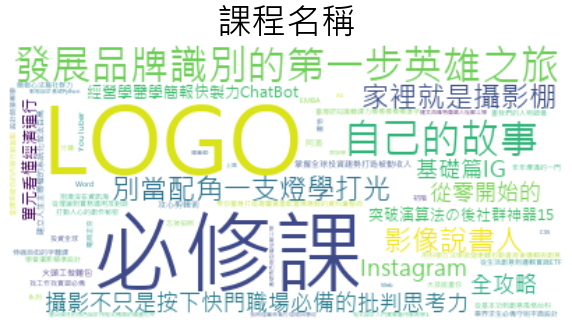

<Figure size 432x288 with 0 Axes>

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import jieba
import numpy as np


#文字雲造型圖片
#文字雲形狀
#mask = np.array(Image.open('picture.png')) 

# 從 Google 下載的中文字型
font = r'msjh.ttc'

#背景顏色預設黑色，改為白色、使用指定圖形、使用指定字體
wordcloud = WordCloud(background_color='white',
                      #mask=mask,
                      font_path=font).generate(title)

plt.figure(figsize = (10,8), facecolor = 'k', frameon = False)
plt.title('課程名稱', fontsize = 35)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.figure()

#存檔
#wordcloud.to_file('word_cloud.png')

接下來我們自己訂定一個指標：Await

Await = solidTickets / successCriti 
也就是實際上課人數/需要募資人數

這個指標意味著預期比率，越高的預期比率也意味著低估該類型課程在市場上的需求度。

In [26]:
df['await'] = df.solidTickets / df.successCriti
df.sort_values('await', ascending = False).head(10)   #依該自訂指標由高而低排序

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.810000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
66,66,用 Python 理財：打造自己的 AI 股票理專,FinLab,2019-04-18,2019-03-20,2019-06-17,NaN,[],56,4.95,False,30,2499,3999,False,PUBLISHED,2332,4,1,77.733333
243,243,從入門到業界實戰 - UI / UX 前端網頁設計,Louis,2017-05-27,2017-04-27,2017-07-11,NaN,[],80,4.80,False,30,650,2500,False,PUBLISHED,2317,5,1,77.233333
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.190000
175,175,從上手到專業，寫出你想要的文案效果,林育聖,2018-04-04,2018-03-06,2018-05-04,NaN,[],82,4.83,False,30,1280,1680,False,PUBLISHED,2247,4,1,74.900000
280,280,比ㄅㄆㄇ簡單的韓語發音,王稚鈞,2016-11-05,2016-10-06,2016-11-30,NaN,[],84,5.00,False,50,990,1590,False,PUBLISHED,3530,11,1,70.600000
339,339,AE/MG || 動畫特效 Vol.1,Yan-K,2016-03-24,2016-02-23,2016-04-30,NaN,[],149,4.86,False,50,1000,1500,False,PUBLISHED,3395,3,1,67.900000
49,49,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,['DIGITAL'],19,5.00,False,30,1680,2680,False,PUBLISHED,1938,6,1,64.600000


In [44]:
# 再次文字雲

highAwait_proposal = df.sort_values('await', ascending = False).head(20)
highAwait_proposal

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.810000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
66,66,用 Python 理財：打造自己的 AI 股票理專,FinLab,2019-04-18,2019-03-20,2019-06-17,NaN,[],56,4.95,False,30,2499,3999,False,PUBLISHED,2332,4,1,77.733333
243,243,從入門到業界實戰 - UI / UX 前端網頁設計,Louis,2017-05-27,2017-04-27,2017-07-11,NaN,[],80,4.80,False,30,650,2500,False,PUBLISHED,2317,5,1,77.233333
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.190000
175,175,從上手到專業，寫出你想要的文案效果,林育聖,2018-04-04,2018-03-06,2018-05-04,NaN,[],82,4.83,False,30,1280,1680,False,PUBLISHED,2247,4,1,74.900000
280,280,比ㄅㄆㄇ簡單的韓語發音,王稚鈞,2016-11-05,2016-10-06,2016-11-30,NaN,[],84,5.00,False,50,990,1590,False,PUBLISHED,3530,11,1,70.600000
339,339,AE/MG || 動畫特效 Vol.1,Yan-K,2016-03-24,2016-02-23,2016-04-30,NaN,[],149,4.86,False,50,1000,1500,False,PUBLISHED,3395,3,1,67.900000
49,49,聲入人心-周震宇的人聲必修課,周震宇,2019-06-19,2019-05-21,2019-08-18,2019-05-20T16:00:00.000Z,['DIGITAL'],19,5.00,False,30,1680,2680,False,PUBLISHED,1938,6,1,64.600000


<Figure size 432x288 with 0 Axes>

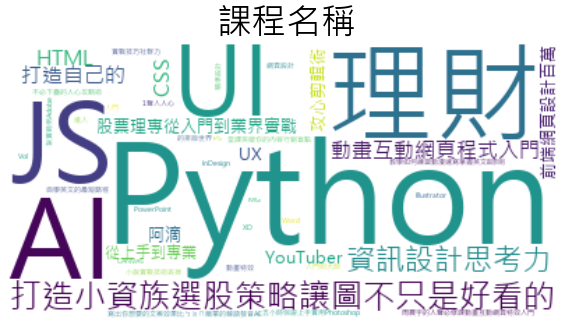

<Figure size 432x288 with 0 Axes>

In [45]:
title = ''

for name in highAwait_proposal.title:
    title += name
    
removeWord = []
for word in removeWord:
    title = title.replace(word, '')
    
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import jieba
import numpy as np

#文字雲造型圖片
#文字雲形狀
#mask = np.array(Image.open('picture.png')) 

# 從 Google 下載的中文字型
font = r'msjh.ttc'

#背景顏色預設黑色，改為白色、使用指定圖形、使用指定字體
wordcloud = WordCloud(background_color='white',
                      #mask=mask,
                      font_path=font).generate(title)

plt.figure(figsize = (10,8), facecolor = 'k', frameon = False)
plt.title('課程名稱', fontsize = 35)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')

plt.figure()

#存檔
#wordcloud.to_file('word_cloud.png')

設計類型可以推廣為行銷、媒體製作等工作能力，程式有理財、網頁等相應能力。


將剛募資成功的課程找出來，查看目前的修課人數:

In [46]:
check_status = df[df.status =='SUCCESS']
check_status.head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
11,11,開啟你的 AI 技能 —— 無痛入門 NLP,AI翻轉教室,2019-10-10,2019-09-11,2019-12-09,NaN,[],0,0.0,False,30,1800,2600,False,SUCCESS,190,10,1,6.333333
12,12,日本求職全攻略，開啟你海外求職第一步,東京工程師,2019-10-09,2019-09-10,2019-12-08,NaN,[],0,0.0,False,30,880,1800,False,SUCCESS,55,10,1,1.833333
13,13,AI 行銷學：用 Python 機器學習創造商業新價值,鍾皓軒,2019-10-03,2019-09-04,2019-12-02,2019-09-04T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,2700,3888,False,SUCCESS,172,10,1,5.733333
14,14,戶外攝影實戰：用鏡頭看見台灣,邢正康,2019-10-02,2019-09-03,2019-12-01,NaN,[],0,0.0,False,30,1300,1800,False,SUCCESS,42,10,1,1.400000
15,15,從生活小物到街景，用鋼筆速寫在日子裡旅行,Nin,2019-09-27,2019-08-29,2019-11-26,NaN,[],0,0.0,False,30,960,1200,False,SUCCESS,147,9,1,4.900000


In [48]:
check_status['await'] = check_status.successCriti / check_status.solidTickets
check_status.sort_values('solidTickets', ascending = False).head(10)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
31,31,金融市場 x 程式交易：通往財富自由之路,Allen 劉曣全,2019-08-14,2019-07-16,2019-10-13,NaN,[],0,0.0,False,30,2950,4200,False,SUCCESS,518,8,1,0.057915
18,18,不用動腦的攝影課-七堂課拍出有質感的照片,peterhuang,2019-09-20,2019-08-22,2019-11-19,2019-08-22T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,490,790,False,SUCCESS,473,9,1,0.105708
19,19,英雄之旅：自己的故事，別當配角,子雍 Tzu-Yung,2019-09-18,2019-08-20,2019-11-17,NaN,[],0,0.0,False,100,1490,2049,False,SUCCESS,444,9,1,0.225225
16,16,illustrator 入門：從形狀到美麗的向量插畫,Iris Lee,2019-09-26,2019-08-28,2019-11-25,NaN,[],0,0.0,False,30,980,1960,False,SUCCESS,319,9,1,0.094044
23,23,區塊鏈應用敲門磚：行動支付到商業案例,區塊勢｜許明恩,2019-09-05,2019-08-07,2019-11-04,2019-08-07T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,1800,2399,False,SUCCESS,285,9,1,0.175439
17,17,小資族 ETF 狠會賺投資法,小資族狠會賺投資法,2019-09-25,2019-08-27,2019-11-24,NaN,[],0,0.0,False,30,2800,3680,False,SUCCESS,274,9,1,0.109489
25,25,R語言和文字探勘 - 洞悉巨量文字的商業價值,大維&辰禧,2019-08-30,2019-08-01,2019-10-29,2019-08-01T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,2190,2790,False,SUCCESS,264,8,1,0.113636
21,21,GA 從零上手！數位時代必學的數據行銷秘笈,數位時代,2019-09-11,2019-08-13,2019-11-10,NaN,[],0,0.0,False,50,1600,2400,False,SUCCESS,259,9,1,0.193050
11,11,開啟你的 AI 技能 —— 無痛入門 NLP,AI翻轉教室,2019-10-10,2019-09-11,2019-12-09,NaN,[],0,0.0,False,30,1800,2600,False,SUCCESS,190,10,1,0.157895
13,13,AI 行銷學：用 Python 機器學習創造商業新價值,鍾皓軒,2019-10-03,2019-09-04,2019-12-02,2019-09-04T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,2700,3888,False,SUCCESS,172,10,1,0.174419


接下來，有沒有人很喜歡在Hahow上開課呢？

我們直接以「作者」來統計開課數目，也就是have的總數!


In [49]:
#先依作者名分組計算have的個別加總值
#再依據have的大小降冪排列
pd.DataFrame(df.groupby('author').have.sum()).sort_values('have',ascending = False).head(15)

,have
author,
藍 國峰,5
Weihang Lidance Chou,4
李柏鋒,4
圖文不符,4
1MustLearn,4
Chang Hong Lin,4
Rainie Chiang,3
Tina Wu,3
Hank Tom,3


前十五名整理了一下：

圖畫電繪
日文教學（語言）
社群/設計（行銷）
瑜珈（健美）
談判、思考
理財
寫App
office操作

可以發現除了工具類技能（圖畫、office、寫App），個人的設計、圖畫、語言、瑜珈等課程也存在市場。當然也有可能跟作者本身的個人魅力有關。

統計一下學生總數:
    

In [50]:
df.groupby('author').solidTickets.sum().nlargest(10)
#在Python中可以直接用nlargest（前n大）取代sort_values().head( n )

author
圖文不符                    23990
吳哲宇                      8786
FinLab                   7861
阿滴 x 圖文不符                7619
Yan-K                    4727
林育聖                      4412
藍 國峰                     3952
Rachel Chen              3706
Weihang Lidance Chou     3544
王稚鈞                      3530
Name: solidTickets, dtype: int64

改用學生數來看，會發現其實並非開越多課越好，有些老師雖然課不多，但學生超多@@
其中當然也有那些"課很多學生也很多"的老師，例如圖文不符、藍國峰

再換個角度，利用「評分」來檢視課程:
    

Text(0.5, 0, '平均評分')

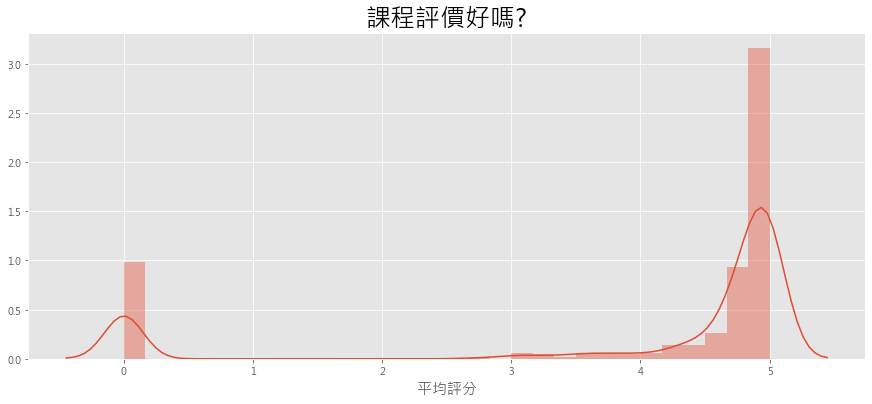

In [53]:
plt.style.use('ggplot')

plt.figure(figsize = (15,6))
sns.distplot(df.avg_ratings, kde = True)
plt.title('課程評價好嗎?',fontsize = 25)
plt.xlabel('平均評分', fontsize = 15)

In [54]:
#篩選一下:
lowScore_course = df[df.avg_ratings<2]
highScore_course = df[df.avg_ratings>4]


In [56]:
lowScore_course.head(10)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07,2019-10-09,2020-01-06,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,False,30,1290,1990,False,INCUBATING,0,11,1,0.000000
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06,2019-10-08,2020-01-05,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,False,30,1200,1580,False,INCUBATING,17,11,1,0.566667
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01,2019-10-03,2019-12-31,NaN,[],0,0.0,False,30,1288,1990,False,INCUBATING,28,11,1,0.933333
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31,2019-10-02,2019-12-30,NaN,[],0,0.0,False,30,1800,2900,False,INCUBATING,6,10,1,0.200000
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30,2019-10-01,2019-12-29,NaN,[],0,0.0,False,30,1450,2500,False,INCUBATING,5,10,1,0.166667
5,5,小資族保險的第一堂入門課,李柏鋒,2019-10-25,2019-09-26,2019-12-24,NaN,[],0,0.0,False,50,988,1688,False,INCUBATING,210,10,1,4.200000
6,6,創作你的療癒香草茶！百種風味搭配邏輯,myhouse,2019-10-23,2019-09-24,2019-12-22,2019-09-24T04:00:00.000Z,['DIGITAL'],0,0.0,False,50,999,1680,False,INCUBATING,93,10,1,1.860000
7,7,托福口說拿分 4 原則｜發音、表達一把罩,英文不難,2019-10-18,2019-09-19,2019-12-17,NaN,[],0,0.0,False,30,1890,2500,False,INCUBATING,49,10,1,1.633333
8,8,LOGO 必修課：發展品牌識別的第一步,馮宇 X 圖文不符,2019-10-17,2019-09-18,2019-12-16,2019-09-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",0,0.0,False,100,1800,2400,False,INCUBATING,431,10,1,4.310000
9,9,Excel VBA 金融資料抓取 | 打造股票研究系統,Raymond Chien,2019-10-16,2019-09-17,2019-12-15,NaN,[],0,0.0,False,30,2350,3450,False,INCUBATING,138,10,1,4.600000


In [57]:
highScore_course.head(10)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
27,27,職場必備的批判思考力：創意力篇,Weihang Lidance Chou,2019-08-28,2019-07-30,2019-09-27,NaN,[],4,5.00,False,30,399,499,False,PUBLISHED,491,8,1,16.366667
36,36,從姿勢開始：生活人體工學 & 痠痛自救法！,SunGuts 三個字,2019-07-24,2019-06-25,2019-09-22,2019-06-25T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",24,4.96,False,30,1600,2200,False,PUBLISHED,405,7,1,13.500000
37,37,手作乾燥花 - 創造植感生活,Irene Hsu,2019-07-19,2019-06-20,2019-09-17,NaN,[],23,5.00,False,30,1200,1800,False,PUBLISHED,111,7,1,3.700000
38,38,一支燈學打光，家裡就是攝影棚,aloke 阿洛克,2019-07-18,2019-06-19,2019-09-16,NaN,[],15,5.00,False,100,1490,1990,False,PUBLISHED,315,7,1,3.150000
39,39,【影像說書人】攝影不只是按下快門,ANCAJAIER 章潔,2019-07-12,2019-06-13,2019-09-10,NaN,[],6,5.00,False,100,1980,2580,False,PUBLISHED,421,7,1,4.210000
40,40,求職平台大揭秘！寫出讓人資心動的專業履歷,Yourator 新創職涯平台,2019-07-10,2019-06-11,2019-09-08,NaN,[],9,5.00,False,30,1200,1800,False,PUBLISHED,165,7,1,5.500000
42,42,新手必學的3件事 - 進場點、停損點、停利點,TOZZI,2019-07-04,2019-06-05,2019-09-02,NaN,[],11,5.00,False,30,399,599,False,PUBLISHED,99,7,1,3.300000
44,44,產品經理職場學：PM 必修的職涯指南！,Evonne Tsai 蔡伊芳,2019-06-28,2019-05-30,2019-07-31,2019-05-30T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",32,4.94,False,30,1399,1888,False,PUBLISHED,754,6,1,25.133333
46,46,廣告照片怎麼拍 ─ 美食拍攝秘訣教給你嘍,南哥 JiHan,2019-06-26,2019-05-28,2019-08-25,NaN,[],3,5.00,False,30,1900,2600,False,PUBLISHED,55,6,1,1.833333
47,47,職場必備的批判思考力：基礎篇,Weihang Lidance Chou,2019-06-21,2019-05-23,2019-07-21,NaN,[],127,4.92,False,100,399,499,False,PUBLISHED,1098,6,1,10.980000


程式設計相關的課程因為比較硬一點，學生有可能上完了課程學不太到什麼東西。

1. 不要用過於基礎、網路上就能查到的資料來上課
2. 內容枯燥，技術性的課程只講技術很容易流於無趣，老師需要多帶一點個人、實務經驗
3. 缺乏對學生背景認知，跳太快，過於進階就不太適合。

評價風氣?用留言數來看看:


count    384.000000
mean      31.208333
std       45.461008
min        0.000000
25%        6.000000
50%       15.000000
75%       36.250000
max      425.000000
Name: ratings, dtype: float64


Text(0.5, 0, '平均留言數')

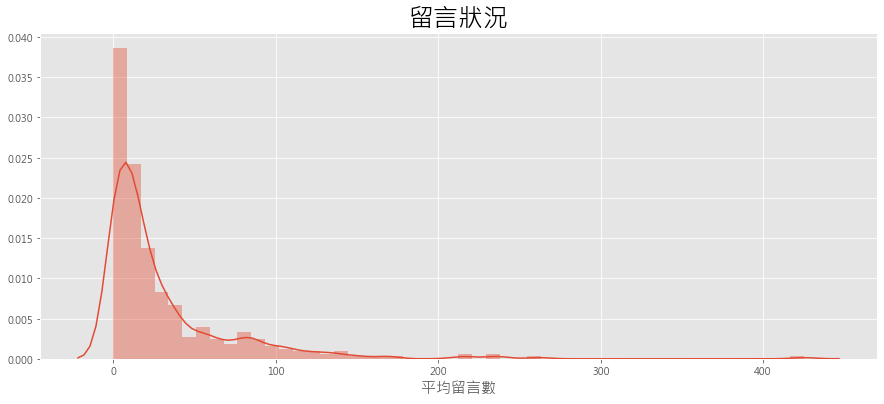

In [58]:
plt.style.use('ggplot')
print(df.ratings.describe())

plt.figure(figsize = (15,6))
sns.distplot(df.ratings, kde = True)
plt.title('留言狀況',fontsize = 25)
plt.xlabel('平均留言數', fontsize = 15)

平均大抵上在10則留言左右，另外有些課程學生很樂於給評價與回饋。

幾百人的課程可能也才10多條評論，那背後的原因是什麼？或者有什麼誘因可以鼓勵學生寫回饋？都是一個可以討論的問題。

In [59]:
#把評論數大於100則的課程篩出來：

df[df.ratings>100].sort_values('avg_ratings',ascending=False)

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
209,209,打動人心的創作秘密，畫出個性的角色設計,水晶孔,2017-10-25,2017-09-26,2017-11-30,NaN,[],168,4.99,False,100,880,1280,False,PUBLISHED,3262,10,1,32.620000
240,240,不必下蠱的人心攻略術 — 小說實戰技術,朱宥勳,2017-06-04,2017-05-05,2017-08-03,NaN,[],101,4.98,False,30,800,1500,False,PUBLISHED,1642,6,1,54.733333
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.300000
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.660000
216,216,當個水彩甜點師 — 雪莉的午茶繪畫課,Sherry雪莉,2017-09-27,2017-08-29,2017-11-26,NaN,[],139,4.96,False,30,880,1200,False,PUBLISHED,1135,9,1,37.833333
329,329,Cartoon 插畫 - 人物篇 (●—●),JUN CHIU,2016-05-09,2016-04-09,2016-07-08,NaN,[],136,4.96,False,30,300,500,False,PUBLISHED,1392,5,1,46.400000
178,178,240 分鐘 - 忘掉拍照，學會攝影,子雍 Tzu-Yung,2018-03-28,2018-02-27,2018-05-27,NaN,[],170,4.96,False,120,1490,2049,False,PUBLISHED,2512,3,1,20.933333
207,207,小資族理財的第一堂入門課,李柏鋒,2017-10-31,2017-10-02,2017-12-30,NaN,[],218,4.96,False,60,888,1688,False,PUBLISHED,1647,10,1,27.450000
108,108,興趣變副業！打造自己的手作品牌,張譯蓁,2018-11-28,2018-10-30,2019-01-27,NaN,[],120,4.95,False,30,1500,2500,False,PUBLISHED,806,11,1,26.866667
206,206,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],129,4.95,False,100,1880,2400,False,PUBLISHED,5508,11,1,55.080000


這裡我們可以發現:
    
1. 簡單/手寫 （手繪、插畫、水彩甜點、寫字）
2. 設計（社群行銷、資訊設計、Adobe）
3. 理財（Python、小資）

是互動非常好的課程。

表示這些主題、內容、講者會是容易被推薦的對象；也就是說，如果想快速發展一個平台、知名度，平台上的課程主題以上面三個為主應該是個不錯的策略。

傳播效應:比較評分以及修課人數，參與課程人數很多是否會有互相推薦的因素在內?
把上課人數超過5000人的課程篩選出來:


In [62]:
df[df.solidTickets>5000]


,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,isReject,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await
75,75,百萬 YouTuber 阿滴－攻心剪輯術！,阿滴 x 圖文不符,2019-03-19,2019-02-18,2019-05-18,2019-02-18T04:00:00.000Z,"['PHYSICAL', 'DIGITAL']",237,4.92,False,100,1200,1800,False,PUBLISHED,7619,3,1,76.19
180,180,用 Python 理財：打造小資族選股策略,FinLab,2018-03-23,2018-02-22,2018-05-22,NaN,[],425,4.98,False,30,1999,3200,False,PUBLISHED,5529,3,1,184.30
206,206,社群力：30 堂課突破你的內容行銷盲點！,圖文不符,2017-11-15,2017-10-17,2018-01-14,NaN,[],129,4.95,False,100,1880,2400,False,PUBLISHED,5508,11,1,55.08
314,314,動畫互動網頁程式入門 (HTML/CSS/JS),吳哲宇,2016-07-03,2016-06-03,2016-09-01,NaN,[],262,4.97,False,50,1000,2000,False,PUBLISHED,5933,7,1,118.66
320,320,讓圖不只是好看的－資訊設計思考力！,圖文不符,2016-06-08,2016-05-09,2016-08-07,NaN,[],213,4.60,False,100,990,1800,False,PUBLISHED,13581,6,1,135.81


In [64]:
print(df.avg_ratings.min())
print(df.avg_ratings.max())

0.0
5.0


In [65]:
print(df.ratings.min())
print(df.ratings.max())

0
425


發現這五堂超過5000人修課的課程，平均評分也都相當高；留言數則是高低不一

In [67]:
#簡單迴歸檢驗假設:
np.corrcoef(df.solidTickets, df.ratings)

array([[1.        , 0.74695509],
       [0.74695509, 1.        ]])

修課人數與留言數的相關係數: 0.7469550876856969


Text(0, 0.5, '留言數量')

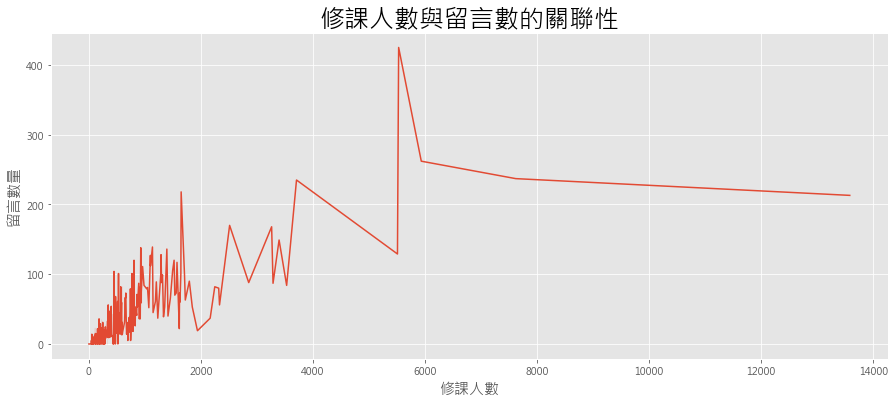

In [73]:
plt.figure(figsize = (15,6))
print('修課人數與留言數的相關係數:', np.corrcoef(df.solidTickets, df.ratings)[1,0])

sns.lineplot(df.solidTickets, df.ratings)  #折線圖
plt.title('修課人數與留言數的關聯性', fontsize = 25)
plt.xlabel('修課人數',fontsize = 15)
plt.ylabel('留言數量',fontsize = 15)


修課人數和留言數量的確有可能因為傳播效應而有所關聯(遞增)；但是更合理的是，修課人數越多，當然評價越多了！

再定義一個feedback_ratio，就是回饋率:

回饋率 = 評論數 / 學生人數

定義出回饋率後，我們把回饋率做排名如下：

In [75]:
df['feedback_ratio'] = df.ratings/df.solidTickets
df.sort_values('feedback_ratio', ascending = False).head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,...,successCriti,prePrice,price,review,status,solidTickets,pro_month,have,await,feedback_ratio
369,369,火箭發射飛行中 Rocket 1,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],14,4.71,...,30,250,1200,False,PUBLISHED,53,8,1,1.766667,0.264151
212,212,資料庫設計 - 有效的使用系統資料,Ryan,2017-10-20,2017-09-21,2017-12-19,NaN,[],104,4.94,...,50,980,1890,False,PUBLISHED,449,10,1,8.980000,0.231626
368,368,火箭飛船遊太空 Rocket 2,Rainie Chiang,2015-08-23,2015-07-24,2015-08-24,NaN,[],10,5.00,...,30,250,1200,False,PUBLISHED,45,8,1,1.500000,0.222222
37,37,手作乾燥花 - 創造植感生活,Irene Hsu,2019-07-19,2019-06-20,2019-09-17,NaN,[],23,5.00,...,30,1200,1800,False,PUBLISHED,111,7,1,3.700000,0.207207
186,186,【不會畫圖】也能學會動態LINE貼圖製作,阿狗阿貓,2018-02-16,2018-01-18,2018-04-17,NaN,[],36,4.97,...,30,988,1488,False,PUBLISHED,182,2,1,6.066667,0.197802


In [77]:
print(df.feedback_ratio.min())
print(df.feedback_ratio.max())


0.0
0.2641509433962264


課程價錢怎麼訂？

我們可以用describe()統計prePrice(預購價格)變量的統計量:

count     384.000000
mean     1103.903646
std       676.481790
min        99.000000
25%       600.000000
50%       990.000000
75%      1500.000000
max      4800.000000
Name: prePrice, dtype: float64


Text(0.5, 0, '金額')

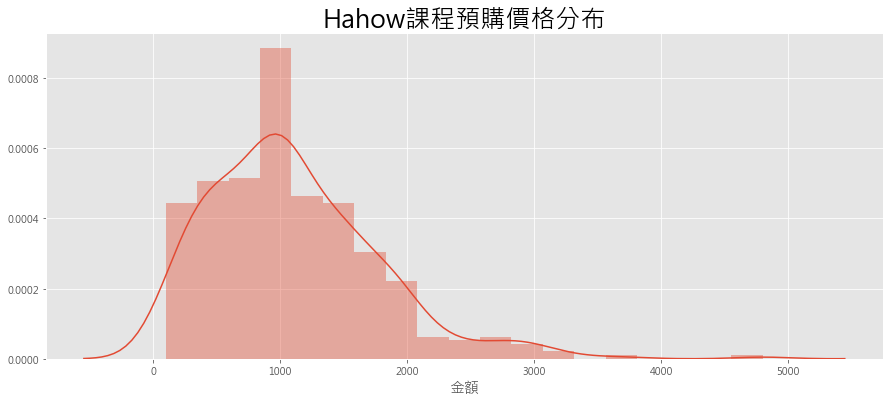

In [79]:
plt.style.use('ggplot')
print(df.prePrice.describe())

plt.figure(figsize = (15,6))
sns.distplot(df.prePrice, kde = True)
plt.title('Hahow課程預購價格分布', fontsize = 25)
plt.xlabel('金額',fontsize = 15)

用describe()統計price(正式價格)變量的統計量:

count     384.000000
mean     1673.153646
std       964.759503
min       150.000000
25%       996.750000
50%      1595.000000
75%      2200.000000
max      7680.000000
Name: price, dtype: float64


Text(0.5, 0, '金額')

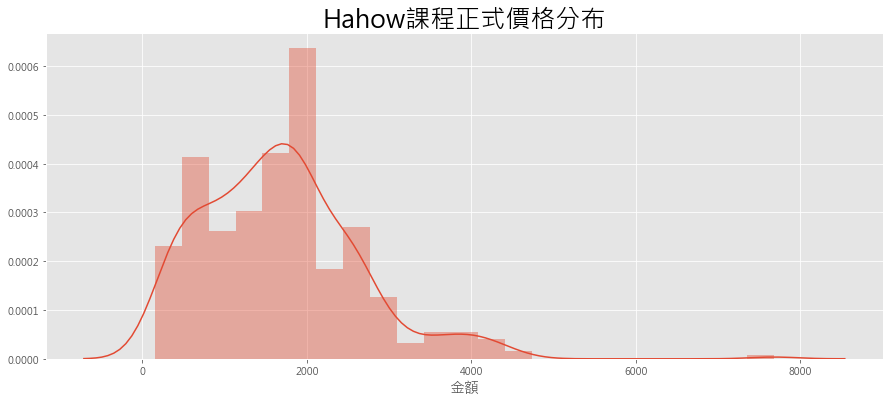

In [80]:
plt.style.use('ggplot')
print(df.price.describe())

plt.figure(figsize = (15,6))
sns.distplot(df.price, kde = True)
plt.title('Hahow課程正式價格分布', fontsize = 25)
plt.xlabel('金額',fontsize = 15)

In [90]:
#直接用差值來比較更快吧

df2 = df.copy()
df2['price_change'] = df2.price - df2.prePrice
df2.head()

,Unnamed: 0,title,author,proposal,incubate,estimateStart,startCapital,types,ratings,avg_ratings,...,prePrice,price,review,status,solidTickets,pro_month,have,await,feedback_ratio,price_change
0,0,LeonTV 空中網球課 - 學會擊球，享受比賽,Leon Tsai,2019-11-07,2019-10-09,2020-01-06,2019-10-09T04:00:00.000Z,['DIGITAL'],0,0.0,...,1290,1990,False,INCUBATING,0,11,1,0.000000,NaN,700
1,1,生活要清爽：讓空間煥然一新的整理收納課,欣講堂 xinforum,2019-11-06,2019-10-08,2020-01-05,2019-10-08T02:00:00.000Z,['DIGITAL'],0,0.0,...,1200,1580,False,INCUBATING,17,11,1,0.566667,0.0,380
2,2,利息養成現金流：債券入門投資術,Z,2019-11-01,2019-10-03,2019-12-31,NaN,[],0,0.0,...,1288,1990,False,INCUBATING,28,11,1,0.933333,0.0,702
3,3,Dropshipping 電商創業 - 零庫存跨境電商,Michael Lin,2019-10-31,2019-10-02,2019-12-30,NaN,[],0,0.0,...,1800,2900,False,INCUBATING,6,10,1,0.200000,0.0,1100
4,4,行銷業務動態儀表板與報告 - Power BI 應用,周勝輝,2019-10-30,2019-10-01,2019-12-29,NaN,[],0,0.0,...,1450,2500,False,INCUBATING,5,10,1,0.166667,0.0,1050


count     384.000000
mean      569.250000
std       406.137663
min         1.000000
25%       300.000000
50%       500.000000
75%       800.000000
max      2880.000000
Name: price_change, dtype: float64


Text(0.5, 0, '金額')

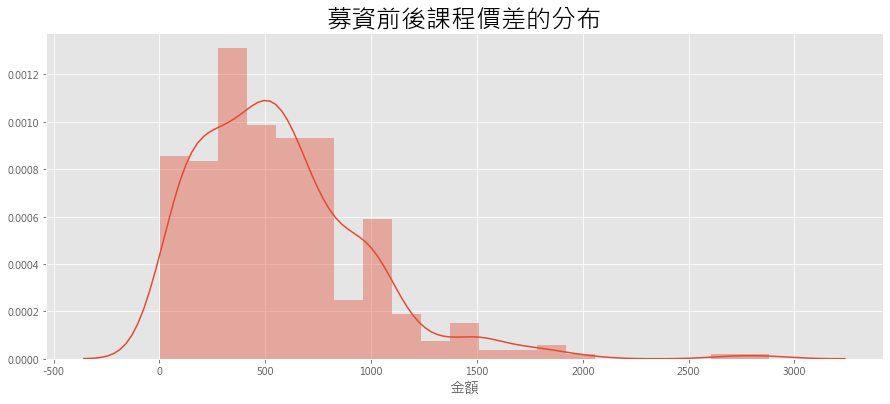

In [93]:
plt.style.use('ggplot')
print(df2.price_change.describe())

plt.figure(figsize = (15,6))
sns.distplot(df2.price_change, kde = True)
plt.title('募資前後課程價差的分布', fontsize = 25)
plt.xlabel('金額',fontsize = 15)